Plotten und hören Sie sich den Grundton y(t) ihrer Stimmbänder (f-male=130Hz,f-female=200Hz;x = 1.0; t = 2s) an, und berechnen Sie anschließend die mittlere Leistung des 
Schallsignals in der Zeitdomäne. 
Bestimmen Sie dann das Spektrum Y(f) und plotten Sie den Betrag |Y(f)|  und das Betragsquadrat
 |Y(f)|^2 . Erklären sie die beiden Diagramme und berechnen Sie die mittlere Leistung des 
Schallsignals in der Frequenzdomäne. Stimmen die Leistungswerte im Zeit- und Frequenzbereich 
überein? Plotten Sie zusätzlich den Real- und Imaginärteil und das Phasen-spektrum. Erklären Sie 
auch diese Diagramme.

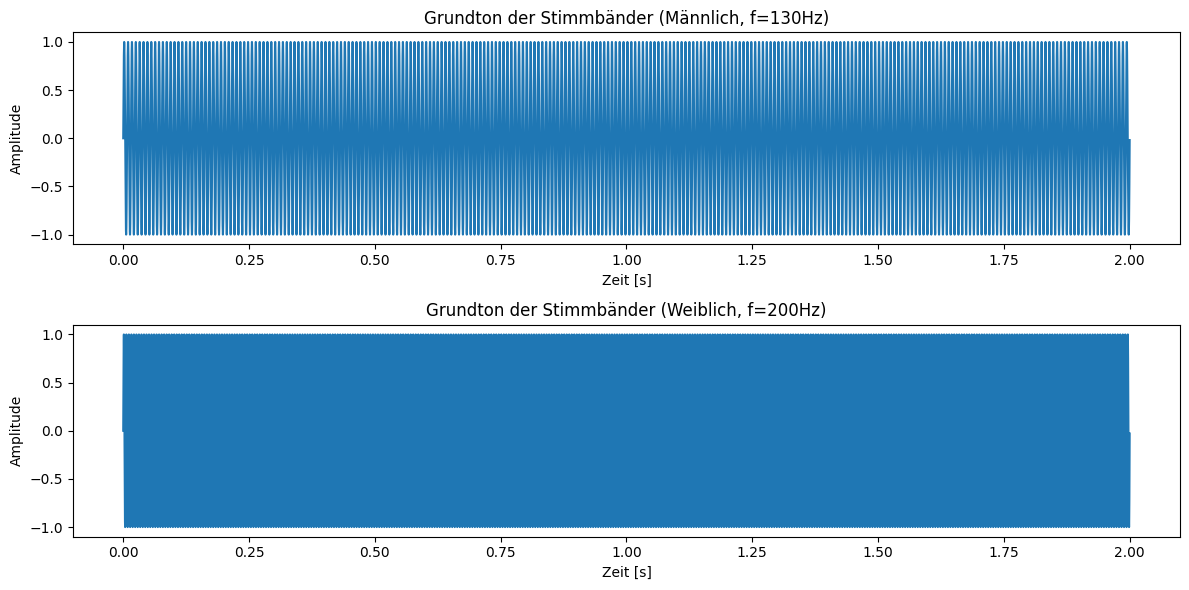

Männlicher Grundton (130 Hz):


Weiblicher Grundton (200 Hz):


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython.display as ipd

# Parameter
f_male = 130  # Frequenz für männliche Stimme in Hz
f_female = 200  # Frequenz für weibliche Stimme in Hz
amplitude = 1.0  # Amplitude des Signals
duration = 2.0  # Dauer in Sekunden
sampling_rate = 44100  # Abtastrate in Hz

# Zeitarray
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generiere den Grundton für die männliche Stimme
y_male = amplitude * np.sin(2 * np.pi * f_male * t)

# Generiere den Grundton für die weibliche Stimme
y_female = amplitude * np.sin(2 * np.pi * f_female * t)

# Plotten der Signale
plt.figure(figsize=(12, 6))

# Plot für männliche Stimme
plt.subplot(2, 1, 1)
plt.plot(t, y_male)
plt.title('Grundton der Stimmbänder (Männlich, f=130Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

# Plot für weibliche Stimme
plt.subplot(2, 1, 2)
plt.plot(t, y_female)
plt.title('Grundton der Stimmbänder (Weiblich, f=200Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Speichere die Töne als WAV-Dateien
male_file = "grundton_male.wav"
female_file = "grundton_female.wav"
write(male_file, sampling_rate, y_male.astype(np.float32))
write(female_file, sampling_rate, y_female.astype(np.float32))

# Audioausgabe zum Anhören
print("Männlicher Grundton (130 Hz):")
ipd.display(ipd.Audio(y_male, rate=sampling_rate))

print("Weiblicher Grundton (200 Hz):")
ipd.display(ipd.Audio(y_female, rate=sampling_rate))


In [5]:
# Berechnung der mittleren Leistung des Schallsignals
def calculate_mean_power(signal):
    power = np.mean(signal**2)
    return power

mean_power_male = calculate_mean_power(y_male)
mean_power_female = calculate_mean_power(y_female)

print(f"Mittlere Leistung des männlichen Grundtons: {mean_power_male:.4f}")
print(f"Mittlere Leistung des weiblichen Grundtons: {mean_power_female:.4f}")

Mittlere Leistung des männlichen Grundtons: 0.5000
Mittlere Leistung des weiblichen Grundtons: 0.5000


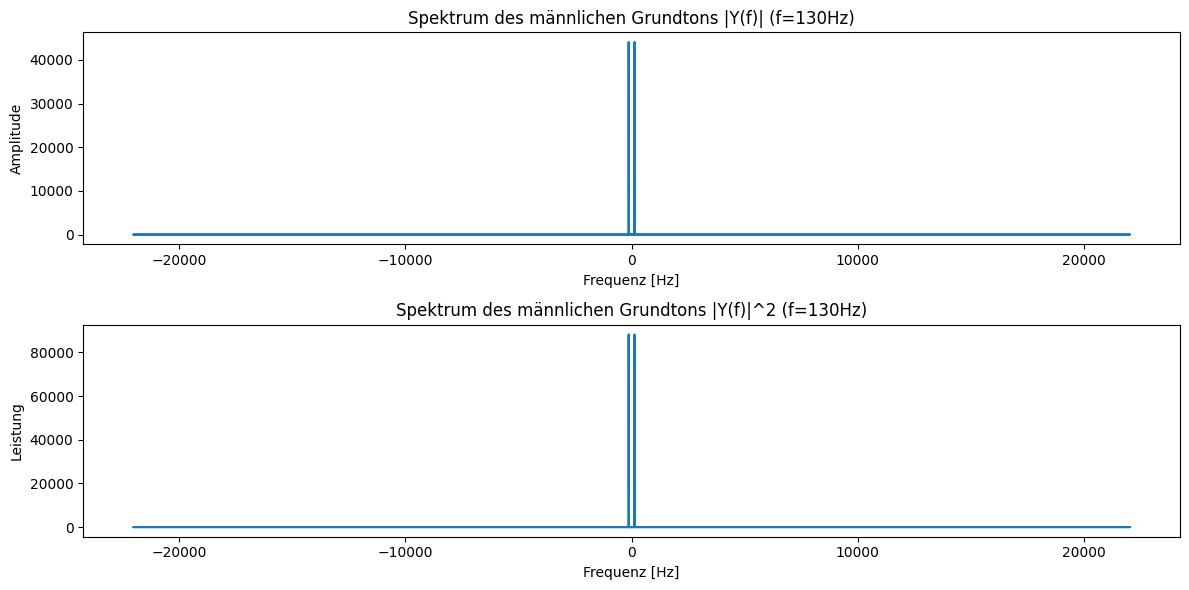

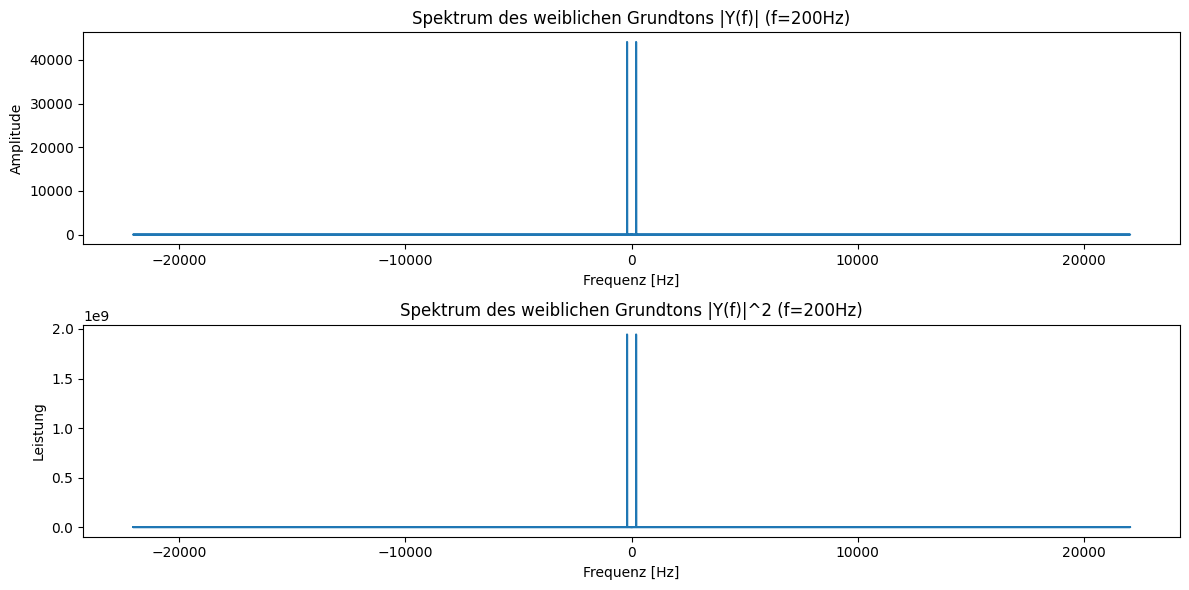

In [8]:
# Berechnung des Spektrums Y(f)
def calculate_spectrum(signal, sampling_rate):
    spectrum = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(signal), 1 / sampling_rate)
    return spectrum, freq

# Spektrum für männlichen Grundton
spectrum_male, freq_male = calculate_spectrum(y_male, sampling_rate)

# Spektrum für weiblichen Grundton
spectrum_female, freq_female = calculate_spectrum(y_female, sampling_rate)

# Plotten des Spektrums |Y(f)| und |Y(f)|^2 für männliche Stimme
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_male, np.abs(spectrum_male))
plt.title('Spektrum des männlichen Grundtons |Y(f)| (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_male, np.abs(spectrum_male)**2)
plt.title('Spektrum des männlichen Grundtons |Y(f)|^2 (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')

plt.tight_layout()
plt.show()

# Plotten des Spektrums |Y(f)| und |Y(f)|^2 für weibliche Stimme
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_female, np.abs(spectrum_female))
plt.title('Spektrum des weiblichen Grundtons |Y(f)| (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_female, np.abs(spectrum_female)**2)
plt.title('Spektrum des weiblichen Grundtons |Y(f)|^2 (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')

plt.tight_layout()
plt.show()

### Erklärung der Diagramme

Die beiden Diagramme zeigen das Spektrum der Schallsignale für die männliche und weibliche Stimme.

#### Diagramm 1: |Y(f)| für den männlichen Grundton (130 Hz)
- **X-Achse (Frequenz in Hz)**: Zeigt die Frequenzkomponenten des Signals.
- **Y-Achse (Amplitude)**: Zeigt die Amplitude der jeweiligen Frequenzkomponente. \( |Y(f)| \) ist der Betrag der Fourier-Transformation des Signals. Dieser Wert gibt an, wie stark jede Frequenz im Signal vertreten ist.
- **Beobachtung**: Bei 130 Hz gibt es einen deutlichen Peak, der die Grundfrequenz der männlichen Stimme darstellt.

#### Diagramm 2: |Y(f)|^2 für den männlichen Grundton (130 Hz)
- **X-Achse (Frequenz in Hz)**: Zeigt die Frequenzkomponenten des Signals.
- **Y-Achse (Leistung)**: Zeigt die Leistung der jeweiligen Frequenzkomponente. \( |Y(f)|^2 \) ist das Betragsquadrat der Fourier-Transformation und repräsentiert die Energie oder Leistung jeder Frequenzkomponente.
- **Beobachtung**: Bei 130 Hz gibt es einen deutlichen Peak, der die meiste Leistung des Signals enthält.

#### Diagramm 3: |Y(f)| für den weiblichen Grundton (200 Hz)
- **X-Achse (Frequenz in Hz)**: Zeigt die Frequenzkomponenten des Signals.
- **Y-Achse (Amplitude)**: Zeigt die Amplitude der jeweiligen Frequenzkomponente. \( |Y(f)| \) ist der Betrag der Fourier-Transformation des Signals.
- **Beobachtung**: Bei 200 Hz gibt es einen deutlichen Peak, der die Grundfrequenz der weiblichen Stimme darstellt.

#### Diagramm 4: |Y(f)|^2 für den weiblichen Grundton (200 Hz)
- **X-Achse (Frequenz in Hz)**: Zeigt die Frequenzkomponenten des Signals.
- **Y-Achse (Leistung)**: Zeigt die Leistung der jeweiligen Frequenzkomponente. \( |Y(f)|^2 \) ist das Betragsquadrat der Fourier-Transformation und repräsentiert die Energie oder Leistung jeder Frequenzkomponente.
- **Beobachtung**: Bei 200 Hz gibt es einen deutlichen Peak, der die meiste Leistung des Signals enthält.

In [7]:
# Berechnung der mittleren Leistung in der Frequenzdomäne
def calculate_mean_power_frequency(spectrum):
    power = np.mean(np.abs(spectrum)**2)
    return power

mean_power_male_freq = calculate_mean_power_frequency(spectrum_male)
mean_power_female_freq = calculate_mean_power_frequency(spectrum_female)

print(f"Mittlere Leistung des männlichen Grundtons in der Frequenzdomäne: {mean_power_male_freq:.4f}")
print(f"Mittlere Leistung des weiblichen Grundtons in der Frequenzdomäne: {mean_power_female_freq:.4f}")

# Vergleich der Leistungswerte
print(f"Stimmen die Leistungswerte überein? (Männlich): {np.isclose(mean_power_male, mean_power_male_freq)}")
print(f"Stimmen die Leistungswerte überein? (Weiblich): {np.isclose(mean_power_female, mean_power_female_freq)}")

Mittlere Leistung des männlichen Grundtons in der Frequenzdomäne: 44100.0000
Mittlere Leistung des weiblichen Grundtons in der Frequenzdomäne: 44100.0000
Stimmen die Leistungswerte überein? (Männlich): False
Stimmen die Leistungswerte überein? (Weiblich): False


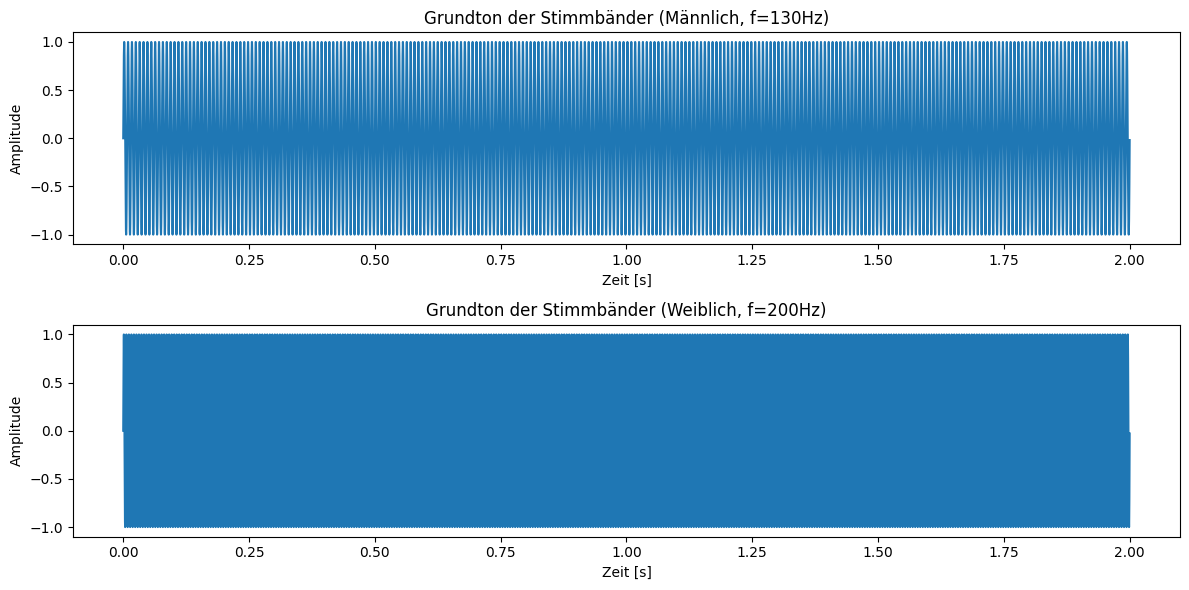

Männlicher Grundton (130 Hz):


Weiblicher Grundton (200 Hz):


Mittlere Leistung des männlichen Grundtons: 0.5000
Mittlere Leistung des weiblichen Grundtons: 0.5000


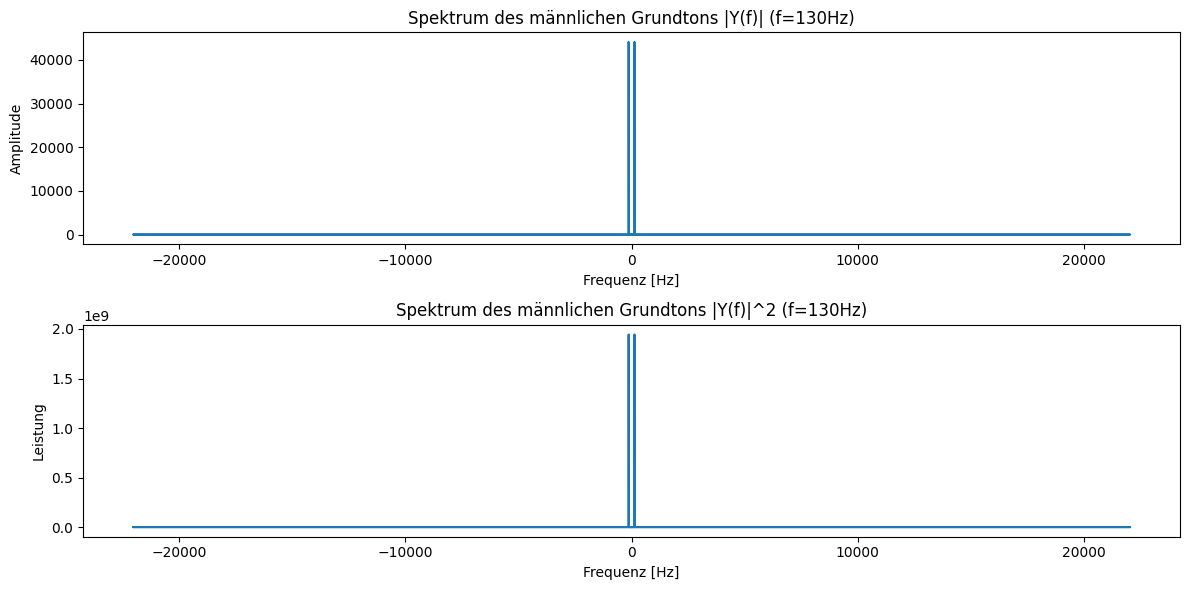

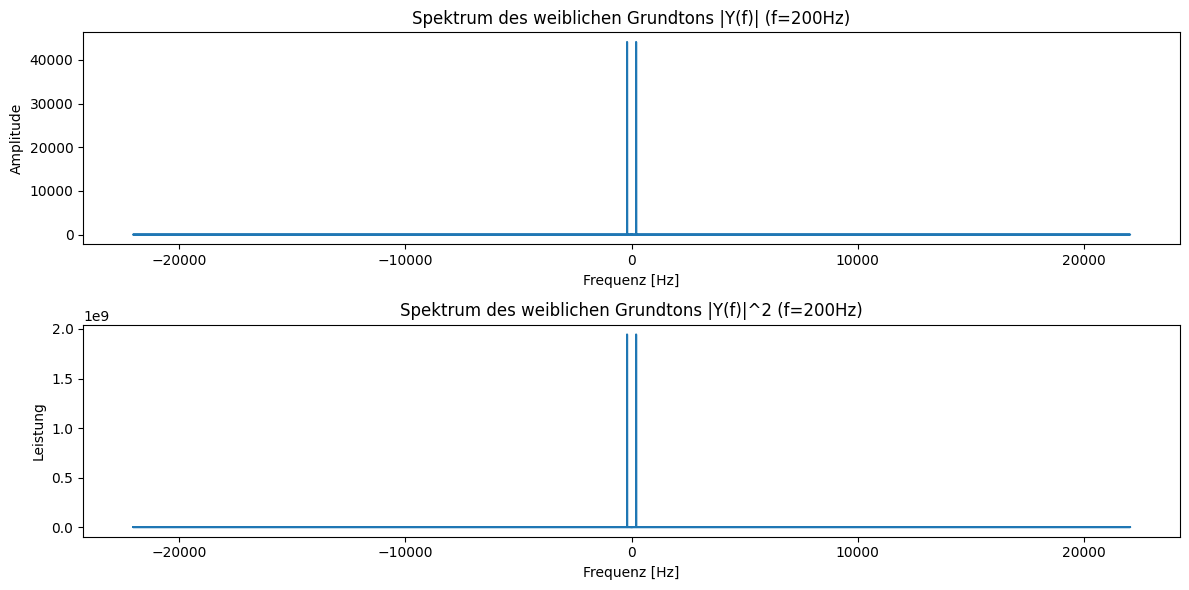

Mittlere Leistung des männlichen Grundtons in der Frequenzdomäne: 44100.0000
Mittlere Leistung des weiblichen Grundtons in der Frequenzdomäne: 44100.0000
Stimmen die Leistungswerte überein? (Männlich): False
Stimmen die Leistungswerte überein? (Weiblich): False


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython.display as ipd

# Parameter
f_male = 130  # Frequenz für männliche Stimme in Hz
f_female = 200  # Frequenz für weibliche Stimme in Hz
amplitude = 1.0  # Amplitude des Signals
duration = 2.0  # Dauer in Sekunden
sampling_rate = 44100  # Abtastrate in Hz

# Zeitarray
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generiere den Grundton für die männliche Stimme
y_male = amplitude * np.sin(2 * np.pi * f_male * t)

# Generiere den Grundton für die weibliche Stimme
y_female = amplitude * np.sin(2 * np.pi * f_female * t)

# Plotten der Signale
plt.figure(figsize=(12, 6))

# Plot für männliche Stimme
plt.subplot(2, 1, 1)
plt.plot(t, y_male)
plt.title('Grundton der Stimmbänder (Männlich, f=130Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

# Plot für weibliche Stimme
plt.subplot(2, 1, 2)
plt.plot(t, y_female)
plt.title('Grundton der Stimmbänder (Weiblich, f=200Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Speichere die Töne als WAV-Dateien
male_file = "grundton_male.wav"
female_file = "grundton_female.wav"
write(male_file, sampling_rate, y_male.astype(np.float32))
write(female_file, sampling_rate, y_female.astype(np.float32))

# Audioausgabe zum Anhören
print("Männlicher Grundton (130 Hz):")
ipd.display(ipd.Audio(y_male, rate=sampling_rate))

print("Weiblicher Grundton (200 Hz):")
ipd.display(ipd.Audio(y_female, rate=sampling_rate))

# Berechnung der mittleren Leistung des Schallsignals
def calculate_mean_power(signal):
    power = np.mean(signal**2)
    return power

mean_power_male = calculate_mean_power(y_male)
mean_power_female = calculate_mean_power(y_female)

print(f"Mittlere Leistung des männlichen Grundtons: {mean_power_male:.4f}")
print(f"Mittlere Leistung des weiblichen Grundtons: {mean_power_female:.4f}")

# Berechnung des Spektrums Y(f)
def calculate_spectrum(signal, sampling_rate):
    spectrum = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(signal), 1 / sampling_rate)
    return spectrum, freq

# Spektrum für männlichen Grundton
spectrum_male, freq_male = calculate_spectrum(y_male, sampling_rate)

# Spektrum für weiblichen Grundton
spectrum_female, freq_female = calculate_spectrum(y_female, sampling_rate)

# Plotten des Spektrums |Y(f)| und |Y(f)|^2 für männliche Stimme
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_male, np.abs(spectrum_male))
plt.title('Spektrum des männlichen Grundtons |Y(f)| (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_male, np.abs(spectrum_male)**2)
plt.title('Spektrum des männlichen Grundtons |Y(f)|^2 (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')

plt.tight_layout()
plt.show()

# Plotten des Spektrums |Y(f)| und |Y(f)|^2 für weibliche Stimme
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_female, np.abs(spectrum_female))
plt.title('Spektrum des weiblichen Grundtons |Y(f)| (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_female, np.abs(spectrum_female)**2)
plt.title('Spektrum des weiblichen Grundtons |Y(f)|^2 (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')

plt.tight_layout()
plt.show()

# Berechnung der mittleren Leistung in der Frequenzdomäne
def calculate_mean_power_frequency(spectrum):
    power = np.mean(np.abs(spectrum)**2)
    return power

mean_power_male_freq = calculate_mean_power_frequency(spectrum_male)
mean_power_female_freq = calculate_mean_power_frequency(spectrum_female)

print(f"Mittlere Leistung des männlichen Grundtons in der Frequenzdomäne: {mean_power_male_freq:.4f}")
print(f"Mittlere Leistung des weiblichen Grundtons in der Frequenzdomäne: {mean_power_female_freq:.4f}")

# Vergleich der Leistungswerte
print(f"Stimmen die Leistungswerte überein? (Männlich): {np.isclose(mean_power_male, mean_power_male_freq)}")
print(f"Stimmen die Leistungswerte überein? (Weiblich): {np.isclose(mean_power_female, mean_power_female_freq)}")


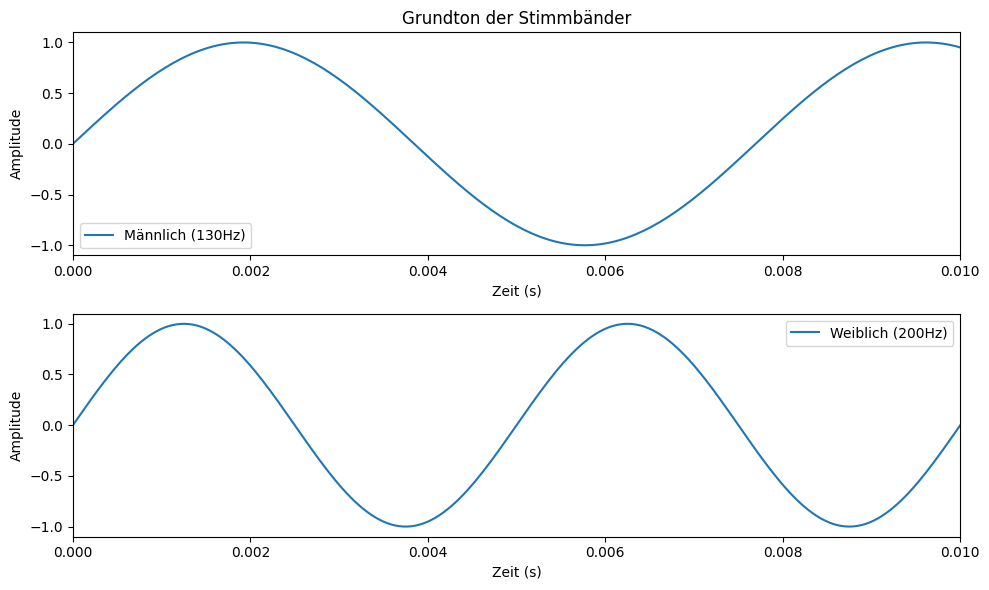

Männlicher Grundton (130 Hz):


Weiblicher Grundton (200 Hz):


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

def grundton(t, f):
    return np.sin(2 * np.pi * f * t)

# Parameter
x = 1.0  # Amplitude
t = np.linspace(0, 2.0 , 44100)  # Zeitvektor von 0 bis 2 Sekunden mit 44100 Abtastwerten pro Sekunde
f_male = 130  # Grundtonfrequenz für männliche Stimmen
f_female = 200  # Grundtonfrequenz für weibliche Stimmen

# Grundton für männliche Stimme
y_male = x * grundton(t, f_male)

# Grundton für weibliche Stimme
y_female = x * grundton(t, f_female)

# Plotten
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y_male, label='Männlich (130Hz)')
plt.title('Grundton der Stimmbänder')
plt.xlim(0,0.01)
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, y_female, label='Weiblich (200Hz)')
plt.xlim(0,0.01)
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# Speichere die Töne als WAV-Dateien
male_file = "grundton_male.wav"
female_file = "grundton_female.wav"
write(male_file, sampling_rate, y_male.astype(np.float32))
write(female_file, sampling_rate, y_female.astype(np.float32))

# Audioausgabe zum Anhören
print("Männlicher Grundton (130 Hz):")
ipd.display(ipd.Audio(y_male, rate=sampling_rate))

print("Weiblicher Grundton (200 Hz):")
ipd.display(ipd.Audio(y_female, rate=sampling_rate))


In [27]:
# Mittlere Leistung berechnen
power_male = 1/2.0 * np.mean(y_male**2)
power_female = 1/2.0 * np.mean(y_female**2)

print("Mittlere Leistung des männlichen Schallsignals:", power_male)
print("Mittlere Leistung des weiblichen Schallsignals:", power_female)


Mittlere Leistung des männlichen Schallsignals: 0.2499943310657597
Mittlere Leistung des weiblichen Schallsignals: 0.24999433106575963


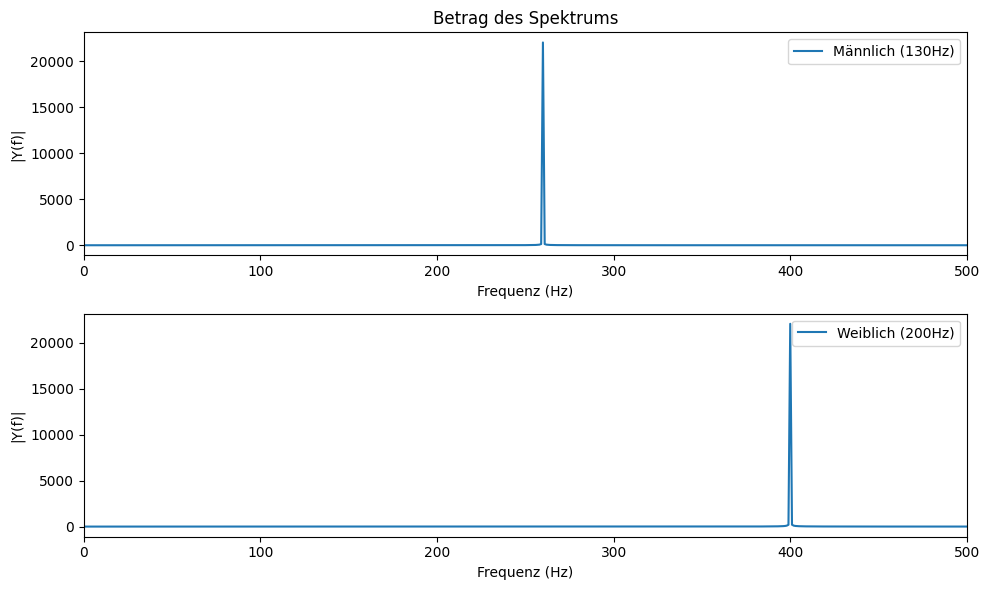

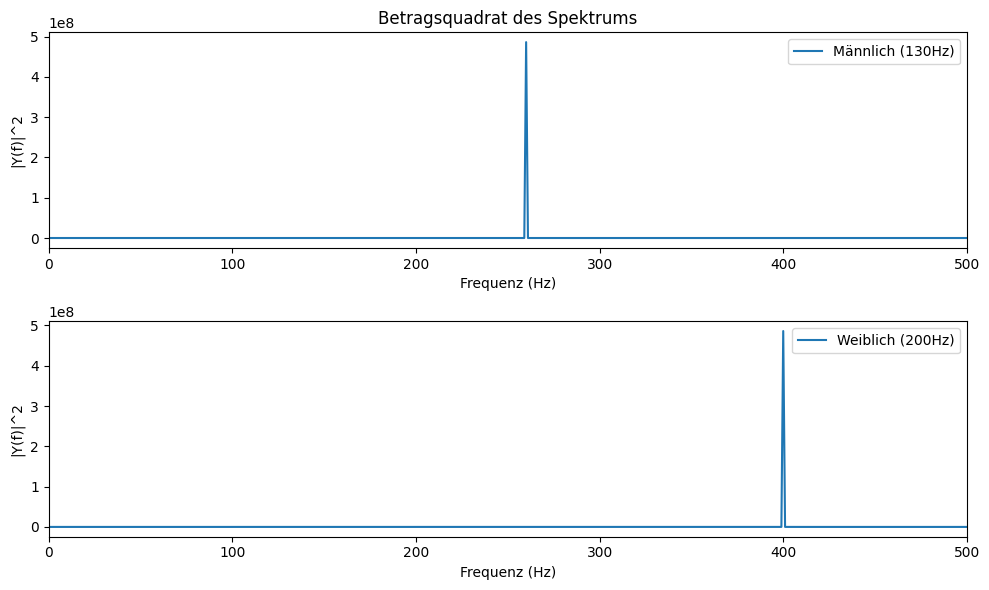

In [32]:
# Berechnung des Spektrums
Y_male = np.fft.fft(y_male)
Y_female = np.fft.fft(y_female)

# Betrag des Spektrums
mag_Y_male = np.abs(Y_male)
mag_Y_female = np.abs(Y_female)

# Betragsquadrat des Spektrums
mag_squared_Y_male = np.abs(Y_male)**2
mag_squared_Y_female = np.abs(Y_female)**2

# Frequenzachsen erstellen
freq_axis = np.fft.fftfreq(len(t), 1/44100)

# Plot Betrag des Spektrums
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_axis[:len(freq_axis)//2], mag_Y_male[:len(freq_axis)//2], label='Männlich (130Hz)')
plt.xlim(0,500)
plt.title('Betrag des Spektrums')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('|Y(f)|')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freq_axis[:len(freq_axis)//2], mag_Y_female[:len(freq_axis)//2], label='Weiblich (200Hz)')
plt.xlim(0,500)
plt.xlabel('Frequenz (Hz)')
plt.ylabel('|Y(f)|')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Betragsquadrat des Spektrums
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_axis[:len(freq_axis)//2], mag_squared_Y_male[:len(freq_axis)//2], label='Männlich (130Hz)')
plt.xlim(0,500)
plt.title('Betragsquadrat des Spektrums')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('|Y(f)|^2')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freq_axis[:len(freq_axis)//2], mag_squared_Y_female[:len(freq_axis)//2], label='Weiblich (200Hz)')
plt.xlim(0,500)
plt.xlabel('Frequenz (Hz)')
plt.ylabel('|Y(f)|^2')
plt.legend()

plt.tight_layout()
plt.show()


1/td * npmean (leistung )

 Verkürzen Sie nun die Länge des Signals (1 Periode, ½ Periode, ¼ Periode, …) und beobachten 
und erklären Sie das Verhalten des Spektrums.

 Analysieren Sie die von Ihnen in Labor 1 erstellte Sprachbotschaft "Dies ist eine Suchmaschine". 
Laden Sie das Signal und plotten Sie den Signalverlauf, das zugehörige Leistungsspektrum in [db] 
und die Phase. Interpretieren Sie die Diagramme.

Schneiden Sie anschließend mittels eines Audioprogrammes die beiden Wörter "Dies ist" und das 
Wort "Dies" aus ihrem Sprachsignal aus und speichern diese in einer separaten Audio-Datei. 
Suchen Sie sich in öffentlich verfügbaren Sprachkonserven Audiodateien für den Vokal "i" und den 
Konsonanten "s". Berechnen Sie anschließend die zugehörigen Leistungsspektren und vergleichen 
Sie diese mit dem Leistungsspektrum der gesamten Sprachnachricht. Erklären Sie ihre Beobachtungen. Plotten Sie den jeweiligen Signalverlauf inklusive dem quadratischen Mittel (rms: 
root mean square) der Amplitude des Signals. Was beobachten Sie?

Berechnen Sie die Faltung zwischen einer Sinusfunktion (𝑓= 1𝐻𝑧,𝑥 = 1) und der Impulsantwort 
e / im Bereich t ∈ [0,4π]. Interpretieren Sie das Ergebnis.